In [1]:
%matplotlib inline
from sklearn import linear_model
import scipy.stats
import os
import shutil
import re
import numpy as np
import pandas as pd
import seaborn as sns
from concurrent.futures import ProcessPoolExecutor
import matplotlib.pyplot as plt
from Bio import SeqIO
from src import contig_stats
sns.set_style("whitegrid")

In [2]:
path = "/media/NGS/Sequence/Mycobacterium_tuberculosis/NCBI"

In [3]:
def run(args):
    fasta, file = args
    id = re.sub(r".fna$", "", file)
    n25, n50, n75, m, c = contig_stats.stats(list(SeqIO.parse(fasta, "fasta")))
    return id, n25, n50, n75, m, c

In [4]:
args = ((os.path.join(path, file), file) for file in os.listdir(path))
data = list(ProcessPoolExecutor(25).map(run, args, chunksize=300))

In [5]:
table = pd.DataFrame(data, columns=["id", "N25", "N50", "N75", "total_length", "counts"])
table

,id,N25,N50,N75,total_length,counts
0,GCA_004112345.1,1901863,1221774,815437,4405906,7
1,GCA_000658255.1,162416,99138,62729,4385981,96
2,GCA_001383215.1,196095,131162,83537,4366506,100
3,GCA_900123985.1,140141,89113,46614,4368566,134
4,GCA_004105685.1,681663,364883,285835,4384292,41
5,GCA_001323905.1,184604,122589,68182,4366238,116
6,GCA_000803825.1,121746,95951,59059,4357371,119
7,GCA_001942805.1,2714581,2714581,1214210,4394380,4
8,GCA_000803925.1,132149,96896,55313,4350857,110
9,GCA_001322865.1,196181,133952,96442,4404440,92


# N25, N50, N75

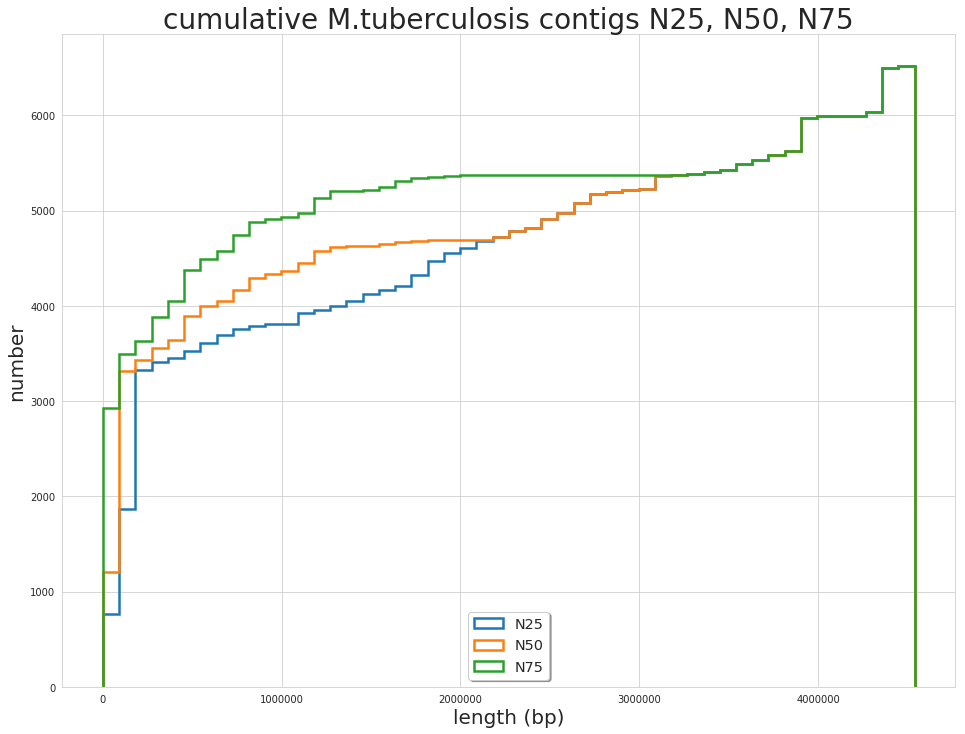

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table["N25"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N25");
ax.hist(table["N50"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N50");
ax.hist(table["N75"], bins=50, histtype="step", cumulative=True, lw=2.5, label="N75");
ax.legend(loc='lower center', shadow=True, fontsize='x-large')
plt.xlabel("length (bp)", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("cumulative M.tuberculosis contigs N25, N50, N75", fontsize=28);

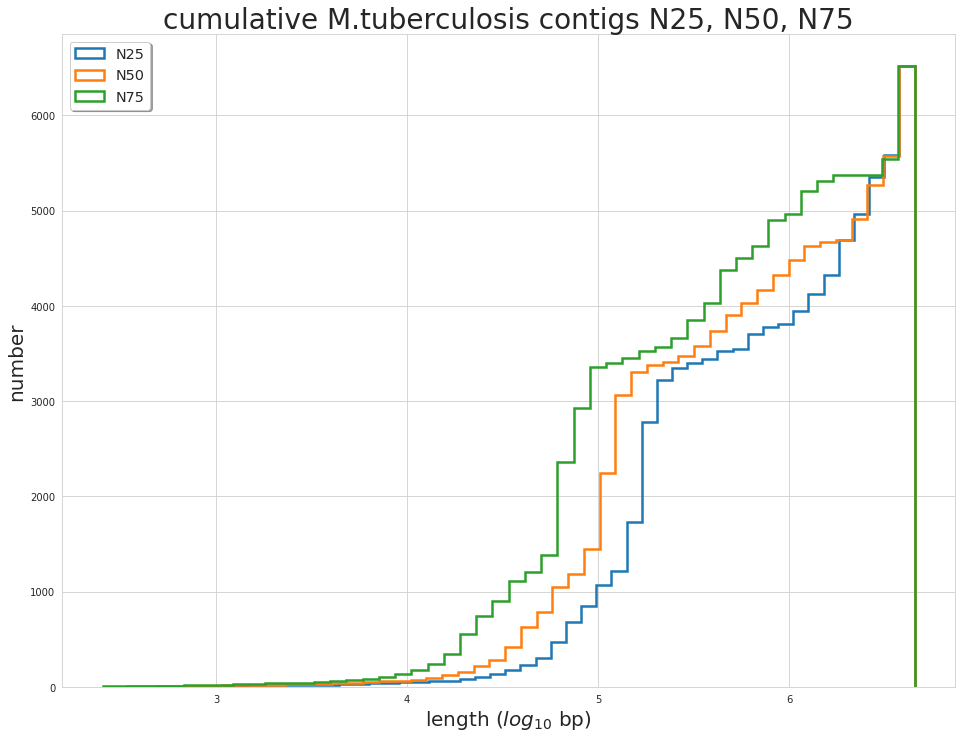

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(np.log10(table["N25"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N25")
ax.hist(np.log10(table["N50"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N50")
ax.hist(np.log10(table["N75"]), bins=50, histtype="step", cumulative=True, lw=2.5, label="N75")
ax.legend(loc='upper left', shadow=True, fontsize='x-large')
plt.xlabel("length ($log_{10}$ bp)", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("cumulative M.tuberculosis contigs N25, N50, N75", fontsize=28);

# Counts

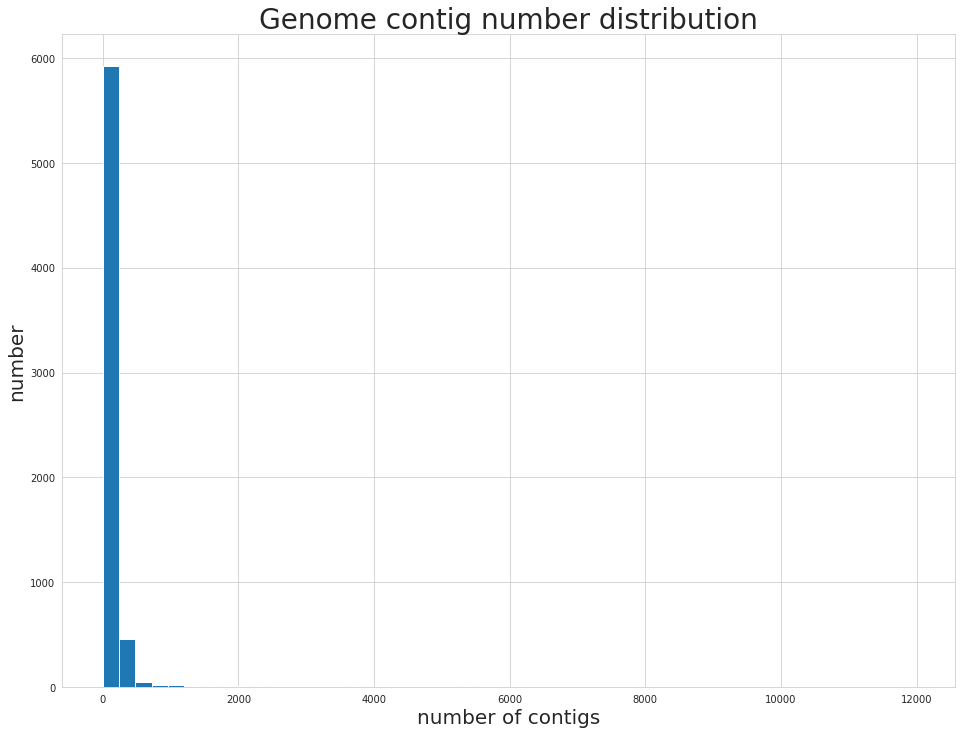

In [10]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution", fontsize=28);

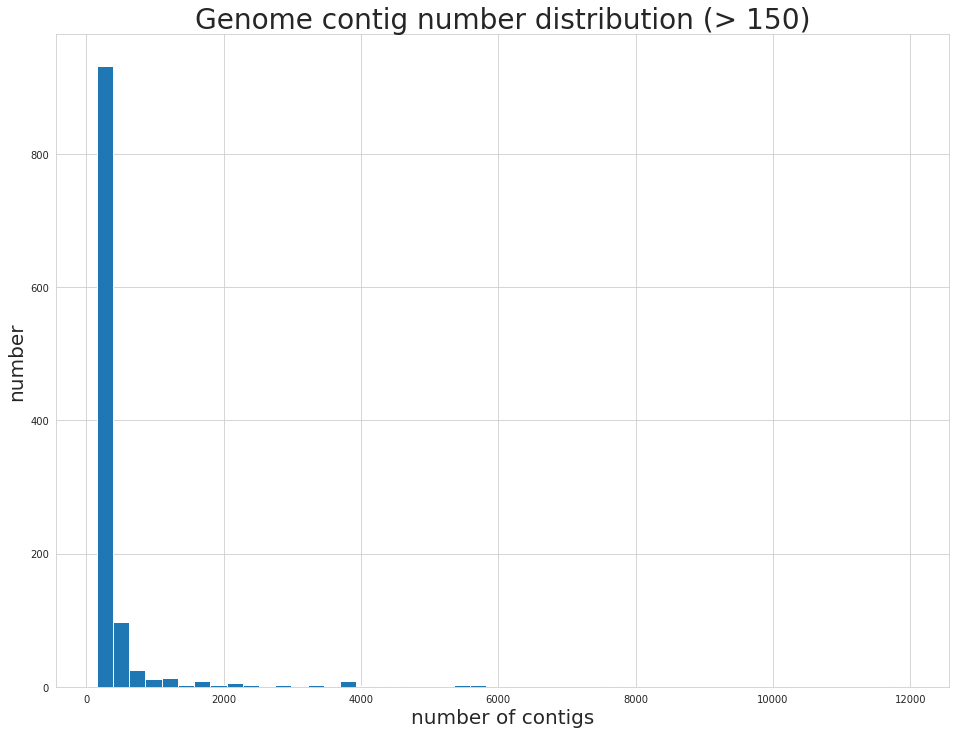

In [12]:
plt.figure(figsize=(16, 12))
plt.hist(table[table["counts"] > 150]["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution (> 150)", fontsize=28);

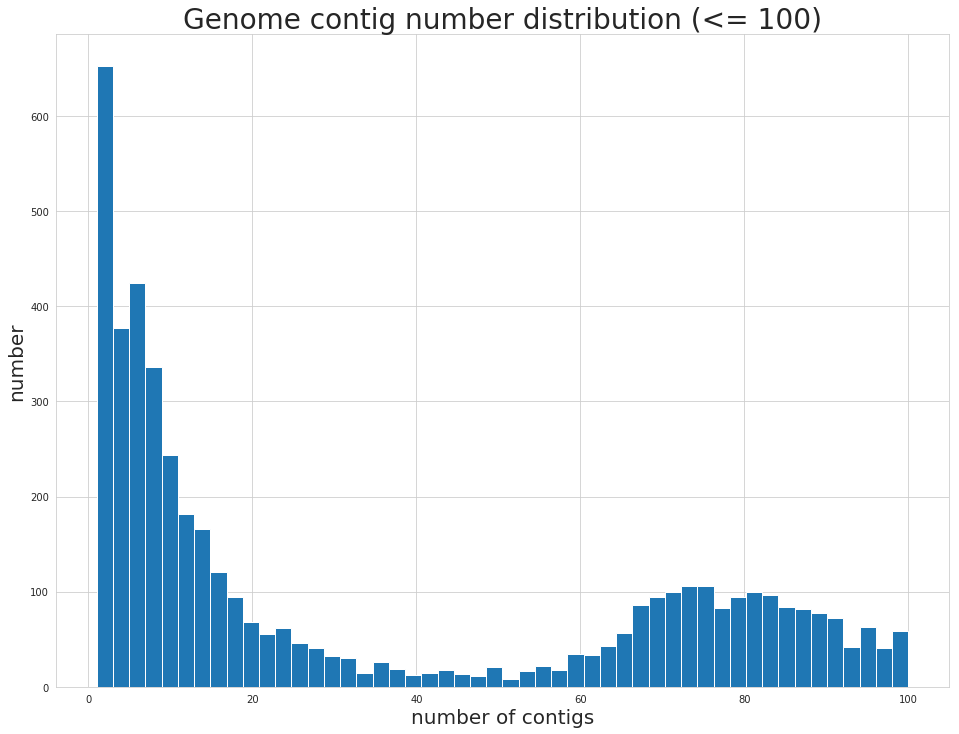

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.hist(table[table["counts"] <= 100]["counts"], bins=50)
plt.xlabel("number of contigs", fontsize=20)
plt.ylabel("number", fontsize=20)
plt.title("Genome contig number distribution (<= 100)", fontsize=28);

# comparison with serotypes

In [16]:
curated = table[(table["counts"] <= 100) & (table["N50"] >= 10 ** 5)]

In [17]:
curated.shape

(4651, 6)

# selection of clean dataset

In [261]:
dst = "/media/NGS/Sequence/Mycobacterium_tuberculosis/NCBI_clean"
exist_file = [i.replace('.fna', '') for i in os.listdir(dst)]
for file in curated["id"]:
    if file not in exist_file:
        shutil.copy(os.path.join(path, file+'.fna'), dst)

In [264]:
for i in (set(exist_file) - set(curated['id'])):
    os.remove(os.path.join(dst, i+'.fna'))